# **Coded Project - Python for Data Science: Austo Automobile Data Analysis**

**Context**


Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

**Objective**

They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.



**Data Description**



*   Age: The age of the individual in years.

*   Gender: The gender of the individual, categorized as male or female.
*   Profession: The occupation or profession of the individual.
*   Marital_status: The marital status of the individual, such as married &, single
*   Education: The educational qualification of the individual Graduate and Post Graduate
*   No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
*   Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
*   House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
*   Partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"
*   Salary: The individual's salary or income.
*   Partner_salary: The salary or income of the individual's partner, if applicable.
*   Total_salary: The total combined salary of the individual and their partner (if applicable).
*   Price: The price of a product or service.
*   Make: The type of automobile



In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import numpy as np
from scipy import stats

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Read the data
df = pd.read_csv('/content/drive/MyDrive/PGPDSA/austo_automobile.csv')
#returns first 5 rows
df.head(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.000,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.000,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.000,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.000,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.000,139900,57000,SUV


# **Data Overview**

###**1. Structure of Data**

In [4]:
df.shape

(1581, 14)

###**2. Type of Data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


###**3. Missing values treatment**

In [6]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [7]:
#Gender column

In [8]:
df[df["Gender"].isnull()].head(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
24,46,NaN,Business,Married,Post Graduate,3,Yes,No,Yes,78000,600.000,78600,50000,SUV
25,46,NaN,Salaried,Married,Post Graduate,3,No,No,Yes,87900,700.000,88600,50000,SUV
67,53,NaN,Salaried,Married,Graduate,4,Yes,No,Yes,80900,30000.000,110900,49000,SUV
125,47,NaN,Salaried,Single,Post Graduate,2,Yes,No,No,87200,0.000,87200,49000,SUV
203,44,NaN,Salaried,Single,Post Graduate,0,Yes,No,No,68600,0.000,68600,50000,SUV


Null values in Gender column may represent non-binary gender identities, we can replace them with the label "Other"

In [9]:
df["Gender"]=df["Gender"].fillna("Other")

In [10]:
df['Gender'].value_counts()

Gender
Male      1199
Female     327
Other       53
Femal        1
Femle        1
Name: count, dtype: int64

In [11]:
#Replace misspelled words in Gender column.

In [12]:
df["Gender"]=df["Gender"].replace("Femal","Female")
df["Gender"]=df["Gender"].replace("Femle","Female")

In [13]:
df['Gender'].value_counts()

Gender
Male      1199
Female     329
Other       53
Name: count, dtype: int64

In [14]:
#Partner_salary column

In [15]:
df[df["Partner_salary"].isnull()]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
40,53,Female,Salaried,Married,Graduate,1,Yes,No,No,72100,NaN,72100,60000,SUV
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600,NaN,88200,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,NaN,170400,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600,NaN,81000,51000,SUV
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300,NaN,161100,62000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,22,Male,Business,Married,Post Graduate,3,Yes,No,No,52100,NaN,52100,28000,Hatchback
1567,22,Male,Salaried,Single,Graduate,0,Yes,Yes,No,39700,NaN,39700,23000,Hatchback
1568,22,Male,Salaried,Married,Graduate,3,No,Yes,No,38000,NaN,38000,23000,Sedan
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback


In [16]:
#fill 0 in Partner_salary for all the rows with Marital_status as Single

In [17]:
df.loc[df["Marital_status"]=="Single","Partner_salary"]=0

In [18]:
#fill 0 in Partner_salary where the partner is not working

In [19]:
df.loc[df["Partner_working"]=="No","Partner_salary"]=0

In [20]:
df.isnull().sum()

Age                  0
Gender               0
Profession           0
Marital_status       0
Education            0
No_of_Dependents     0
Personal_loan        0
House_loan           0
Partner_working      0
Salary               0
Partner_salary      16
Total_salary         0
Price                0
Make                 0
dtype: int64



*   There are 16 missing values in Partner_salary.
*   We will treat these missing values after understanding the distributions of features in the data, the relationships that exist in the data. This will help us impute these values more effectively.



###**4. Data Duplicates**

In [21]:
df.duplicated().sum()

0

Since there is no primary key, we are unable to remove rows even if there are duplicates present.







###**5. Statistical Summary**

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.000,31.922,8.426,22.000,25.000,29.000,38.000,54.000
No_of_Dependents,1581.000,2.458,0.943,0.000,2.000,2.000,3.000,4.000
Salary,1581.000,60392.220,14674.825,30000.000,51900.000,59500.000,71800.000,99300.000
Partner_salary,1565.000,19062.428,19576.736,0.000,0.000,25000.000,38100.000,80500.000
Total_salary,1581.000,79625.996,25545.858,30000.000,60500.000,78000.000,95900.000,171000.000
Price,1581.000,35597.723,13633.637,18000.000,25000.000,31000.000,47000.000,70000.000


Observations and insights

* The age distribution appears relatively centered around the late 20s to late 30s, with a few individuals in their early 20s and 50s. The standard deviation suggests moderate variability in ages across the sample.
*	The average number of dependents per individual is slightly above 2, with relatively low variability (standard deviation of less than 1), suggesting a consistent family size within the sample.
*	The salary distribution shows a moderate spread around the mean, with a notable standard deviation indicating variability in income levels among the sample.
*	There is significant variation in partner's salaries within the sample, with a sizable portion having no reported income.
*	The price distribution indicates a range of expenditures or costs, with a moderate spread around the mean price.



In [23]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

###**6. Percentage of categorical columns**

In [24]:
cat_cols=["Gender","Profession","Marital_status","Education","Personal_loan","House_loan","Partner_working","Make"]

In [25]:
for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

Gender
Male     0.758
Female   0.208
Other    0.034
Name: proportion, dtype: float64
--------------------------------------------------
Profession
Salaried   0.567
Business   0.433
Name: proportion, dtype: float64
--------------------------------------------------
Marital_status
Married   0.913
Single    0.087
Name: proportion, dtype: float64
--------------------------------------------------
Education
Post Graduate   0.623
Graduate        0.377
Name: proportion, dtype: float64
--------------------------------------------------
Personal_loan
Yes   0.501
No    0.499
Name: proportion, dtype: float64
--------------------------------------------------
House_loan
No    0.667
Yes   0.333
Name: proportion, dtype: float64
--------------------------------------------------
Partner_working
Yes   0.549
No    0.451
Name: proportion, dtype: float64
--------------------------------------------------
Make
Sedan       0.444
Hatchback   0.368
SUV         0.188
Name: proportion, dtype: float64
---------

Observations and insights

* The majority of individuals in the sample identify as male, with a smaller proportion identifying as female and a small percentage identifying as non-binary or other genders.
* More than half of the sample consists of salaried individuals, while the remaining are engaged in business or entrepreneurial activities.
* The vast majority of individuals in the sample are married, with a relatively small proportion being single.
* A significant portion of the sample has completed post-graduate education, while the remainder have completed undergraduate education.
* A significant portion of the sample has completed post-graduate education, while the remainder have completed undergraduate education.
* A majority of individuals in the sample do not have a house loan, while a third have taken a house loan.
* Slightly more than half of the individuals have a partner who is employed or working.
* Sedans are the most popular type of car among the sample, followed by hatchbacks and SUVs.

# **Univariate Analysis**

###Age

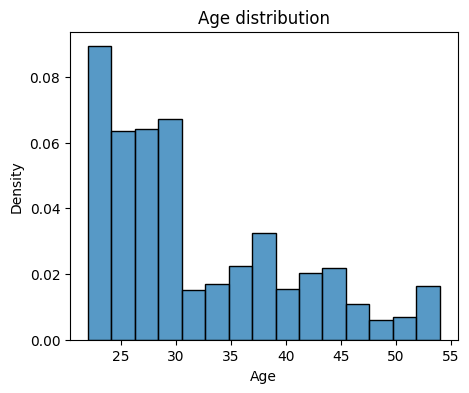

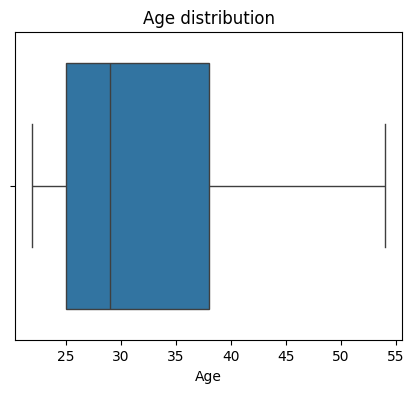

In [28]:
plt.figure(figsize=(5,4))
sns.histplot(data=df,x='Age',stat='density')
plt.title("Age distribution")
plt.show()
plt.figure(figsize=(5,4))

sns.boxplot(data=df,x='Age')
plt.title("Age distribution")
plt.show()

* Skewed towards right and 75% of the customers are under the age of 40.

###Gender

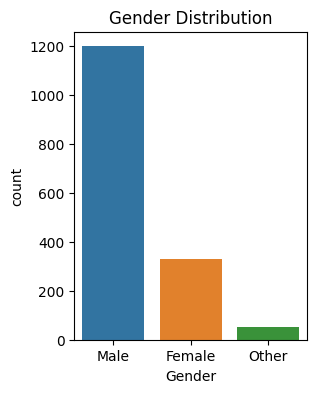

In [32]:
plt.figure(figsize=(3,4))
sns.countplot(data=df,x='Gender', hue="Gender")
plt.title("Gender Distribution")
plt.show()

* Majority of the customers are male.

###Profession

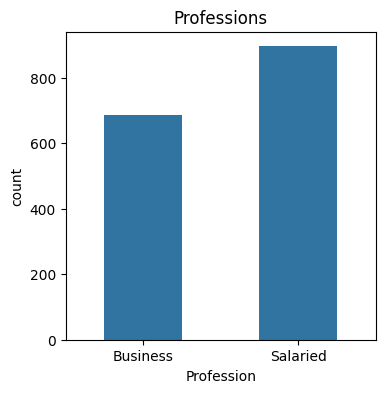

In [44]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x='Profession', width=0.5)
plt.title("Professions")
plt.show()

Uniformly distributed between Salaried and Business

###Marital Status

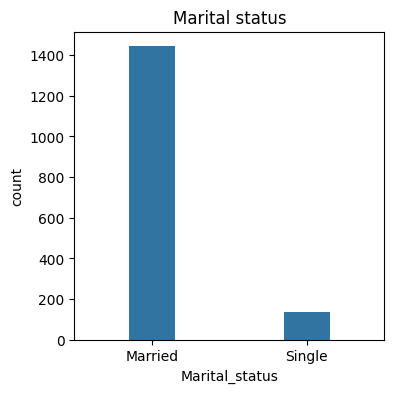

In [49]:
plt.figure(figsize=(4,4))

sns.countplot(data=df,x='Marital_status',width=0.3)
plt.title("Marital status")
plt.show()

Majority of customers are married.

###Education

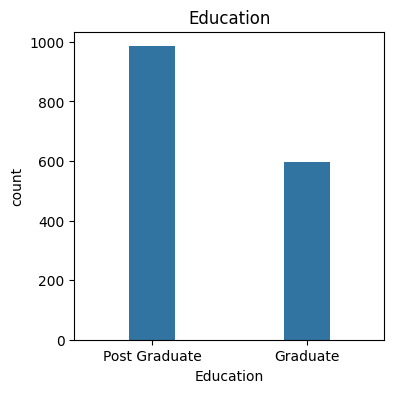

In [51]:
plt.figure(figsize=(4,4))

sns.countplot(data=df,x='Education', width=0.3)
plt.title("Education")

plt.show()

A greater number of individuals who have completed post-graduate studies could suggest higher salaries.

###Number of dependents

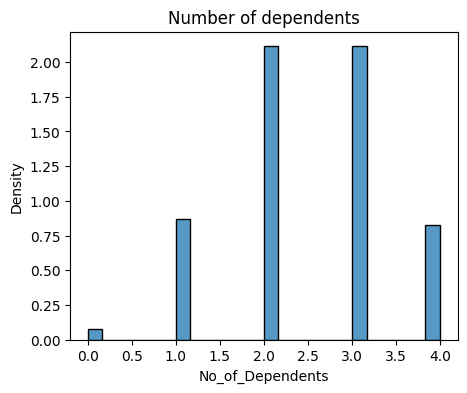

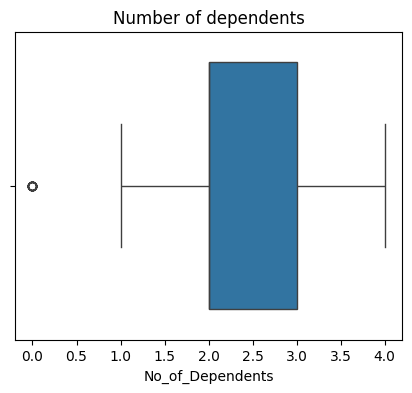

In [56]:
plt.figure(figsize=(5,4))
sns.histplot(data=df,x='No_of_Dependents',stat='density')
plt.title("Number of dependents")
plt.show()

plt.figure(figsize=(5,4))
sns.boxplot(data=df,x='No_of_Dependents')
plt.title("Number of dependents")
plt.show()

Zero dependents are labeled as outliers in the box plot, but we should retain them as such.

### Personal Loan

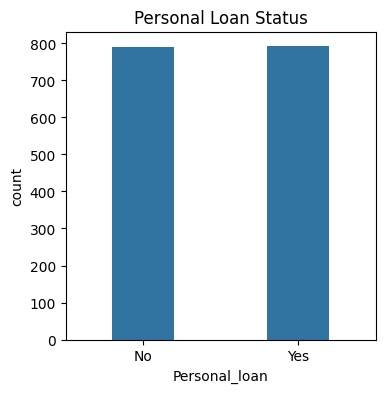

In [59]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x='Personal_loan', width=0.4)
plt.title("Personal Loan Status")
plt.show()

Uniformly distributed

###House Loan

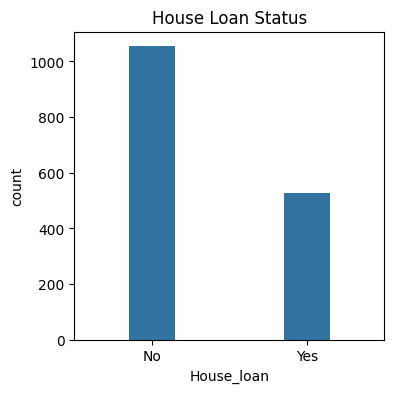

In [60]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x='House_loan', width=0.3)
plt.title("House Loan Status")
plt.show()


The majority of customers did not opt for a home loan.

### Working Partner

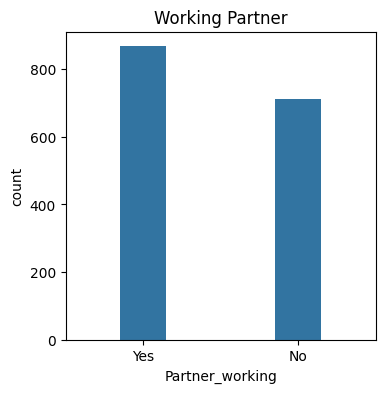

In [62]:
plt.figure(figsize=(4,4))

sns.countplot(data=df,x='Partner_working', width=0.3)
plt.title("Working Partner")

plt.show()


A higher number of customers have partners who are employed.

###Salary

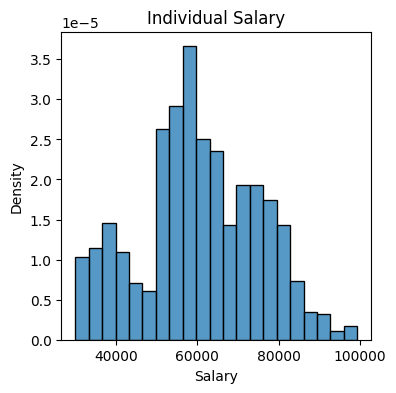

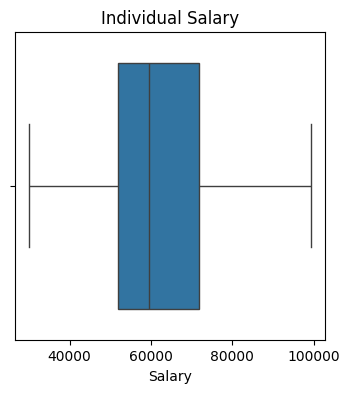

In [63]:
plt.figure(figsize=(4,4))
sns.histplot(data=df,x='Salary',stat='density')
plt.title("Individual Salary")
plt.show()
plt.figure(figsize=(4,4))

sns.boxplot(data=df,x='Salary')
plt.title("Individual Salary")

plt.show()

Normally distributed with no outliers

###Partner Salary

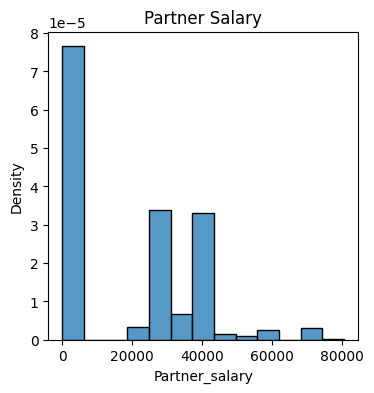

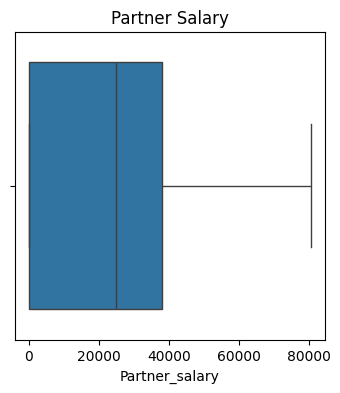

In [64]:
plt.figure(figsize=(4,4))
sns.histplot(data=df,x='Partner_salary',stat='density')
plt.title("Partner Salary")
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(data=df,x='Partner_salary')
plt.title("Partner Salary")
plt.show()

* Distribution is right-skewed with no outliers.
* Missing values can be replaced with the median.

In [37]:
df[df['Partner_salary'].isnull()]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600,NaN,88200,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,NaN,170400,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600,NaN,81000,51000,SUV
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300,NaN,161100,62000,SUV
209,43,Female,Salaried,Married,Graduate,4,Yes,No,Yes,53400,NaN,123900,64000,SUV
284,41,Female,Business,Married,Post Graduate,2,No,No,Yes,70500,NaN,105800,33000,Sedan
339,39,Male,Salaried,Married,Post Graduate,2,Yes,No,Yes,76800,NaN,115400,50000,Sedan
376,38,Male,Salaried,Married,Post Graduate,2,Yes,No,Yes,79000,NaN,117400,46000,Sedan
424,37,Female,Salaried,Married,Graduate,2,Yes,Yes,Yes,62000,NaN,100700,46000,Sedan
444,36,Male,Business,Married,Post Graduate,2,No,No,Yes,72300,NaN,112400,48000,Sedan


In [38]:
median_value = df['Partner_salary'].median()

In [39]:
#Missing values in the column is replaced with median
df['Partner_salary'].fillna(median_value, inplace=True)

In [40]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

###Total Salary

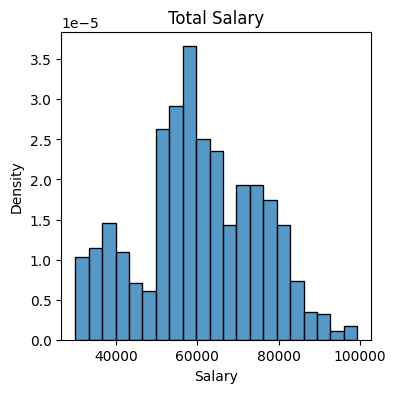

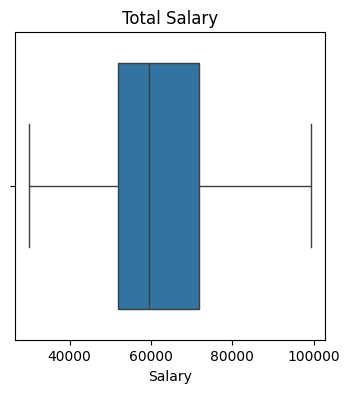

In [65]:
plt.figure(figsize=(4,4))
sns.histplot(data=df,x='Salary',stat='density')
plt.title("Total Salary")
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(data=df,x='Salary')
plt.title("Total Salary")

plt.show()

Normally distributed with no outliers

###Price

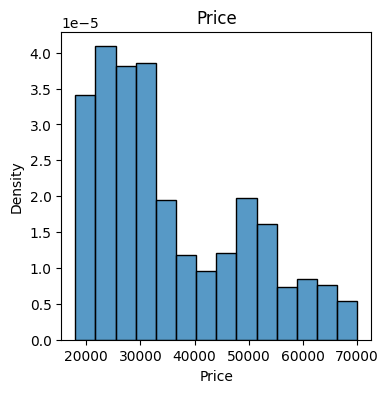

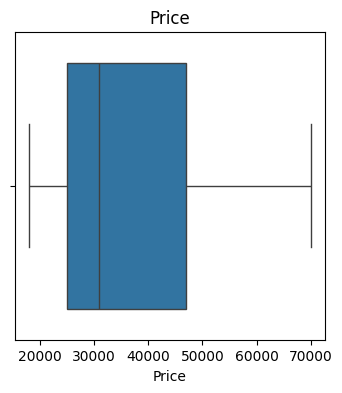

In [66]:
plt.figure(figsize=(4,4))

sns.histplot(data=df,x='Price',stat='density')
plt.title("Price")

plt.show()

plt.figure(figsize=(4,4))

sns.boxplot(data=df,x='Price')
plt.title("Price")

plt.show()

* The Price column is right-skewed.
* A larger number of customers purchase cars priced between 20K and 30K.







###Make

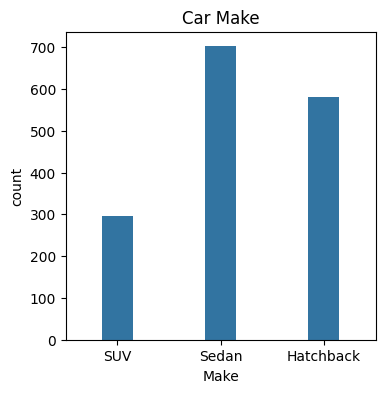

In [68]:
plt.figure(figsize=(4,4))

sns.countplot(data=df,x='Make', width=0.3)
plt.title("Car Make")
plt.show()

Customers show a preference for sedans and hatchbacks over SUVs.







#**Bivariate Analysis**

## Correlation between numerical variables

###Heat Map and Pair Plot

In [69]:
num_cols=["Age","No_of_Dependents","Salary","Partner_salary","Total_salary","Price"]
corr=df[num_cols].corr()

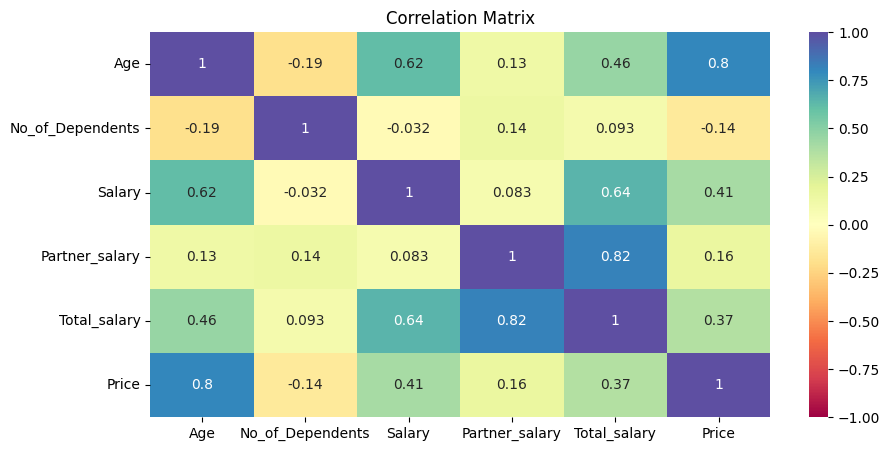

In [70]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.title("Correlation Matrix")
plt.show()

<Figure size 400x400 with 0 Axes>

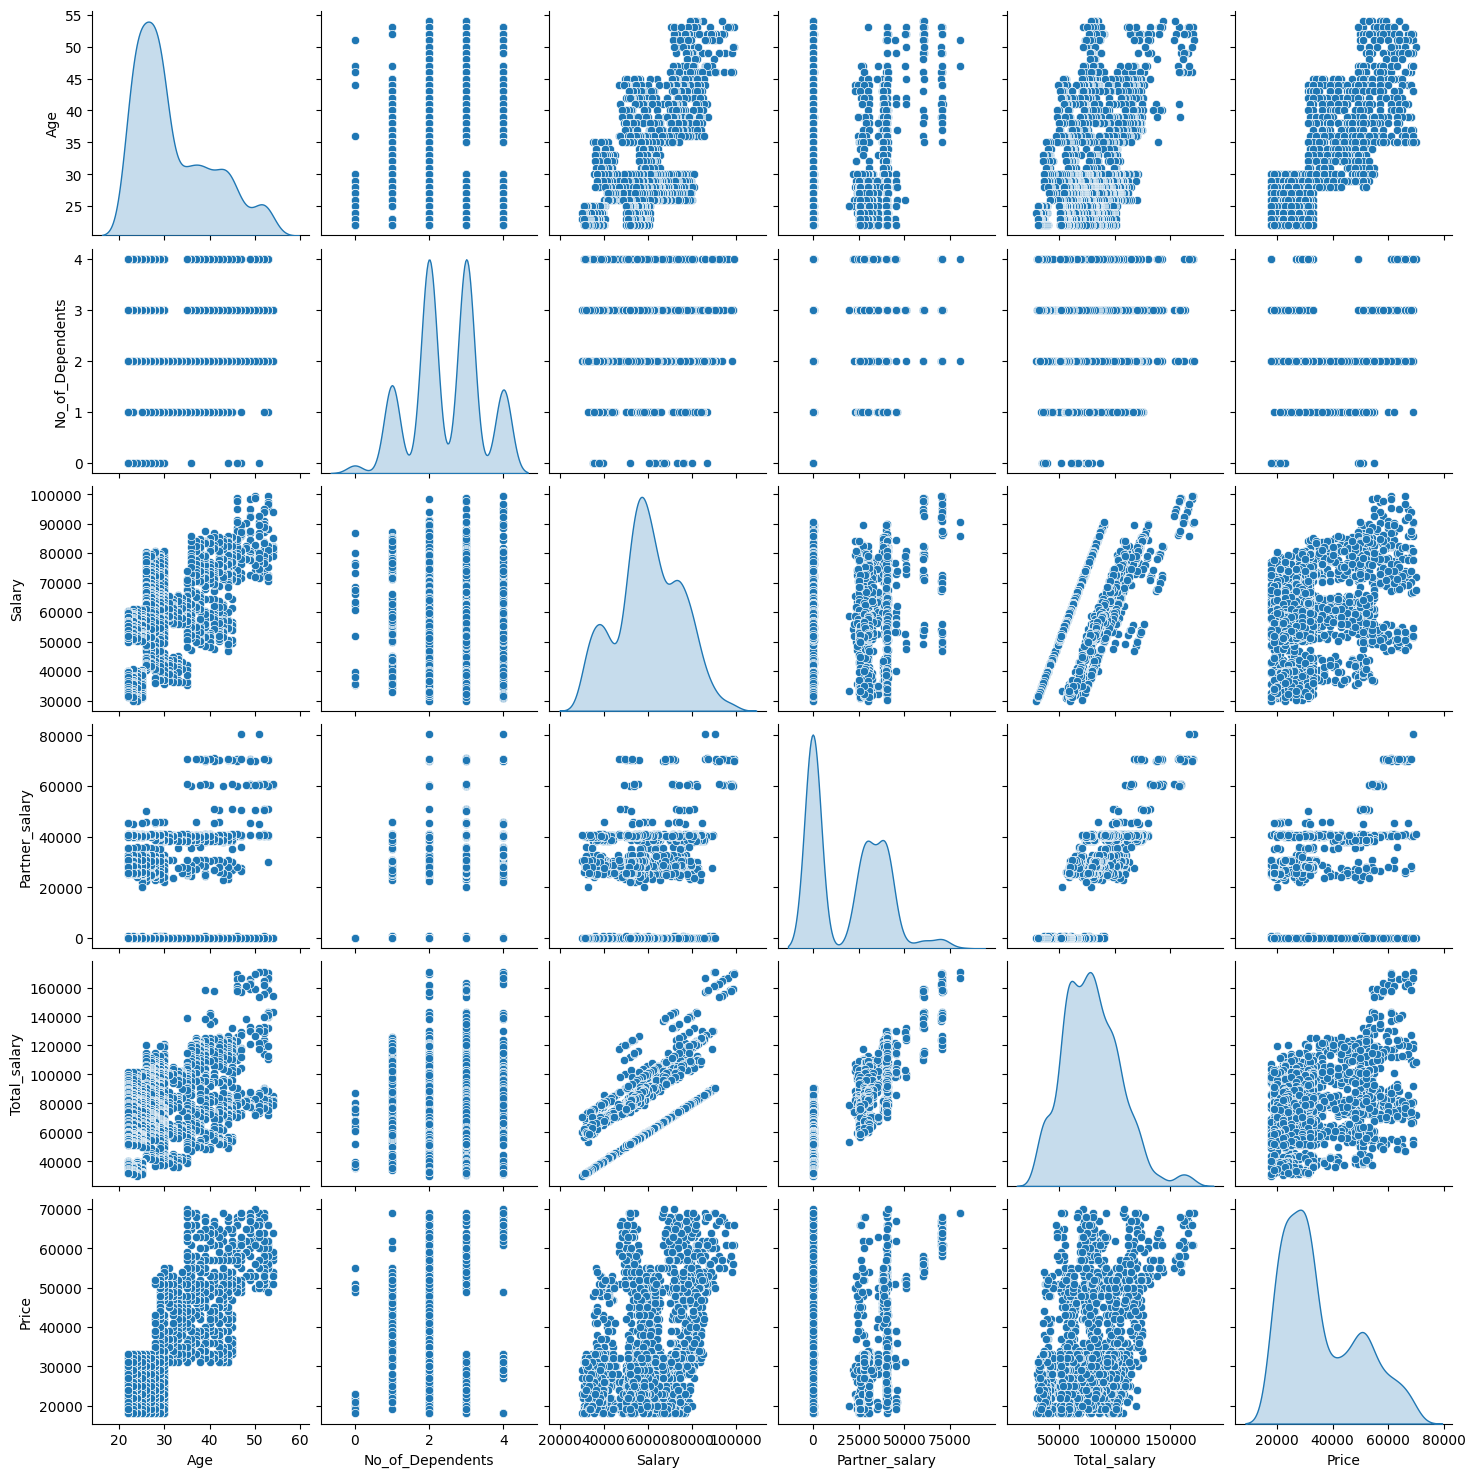

In [73]:
plt.figure(figsize=(4,4))
sns.pairplot(data=df[num_cols], diag_kind="kde")
# plt.title("Relationship between numerical variables")
plt.show()

####Observations

* The price of the car is positively correlated with the age of the person.
* The salary of a partner correlates positively with the total salary in a manner akin to the correlation between individual salary and total salary.
* The age of the person and salary show a positive correlation.
* Slight Negative correlation between salary/age and number of dependents, but this can be regarded as no relationship.
* There is a slight positive correlation between price and total salary, but it's not very high.



Correlation between each two variables

* Age vs Number of dependents: No relationship between Age and number of dependents
* Age vs Salary: There is a positive correlation between Age and Salary
* Age vs Partner salary: No relationship between Age and partner salary
* Age and Total salary: As expected, there is a positive correlation between Age and Total salary but it is not very high.
* Age vs Price: A positive correlation or an increasing trend can be clearly observed between Age and Price
* Number of dependents vs Salary: There is a negative correlation, but it's not high. This can be regarded as no relationship between Number of dependents and salary
* Number of dependents vs Partner Salary: No relationship between Number of dependents and partner salary
* Number of dependents vs Total Salary: No relationship between Number of dependents and total salary
* Number of dependents vs Price: No relationship between Number of dependents and price
* Salary vs Partner salary: No relationship between Salary and Partner salary
* Salary vs Total Salary: There is positive correlation between salary and total salary, it implies that higher individual salaries are associated with higher combined (total) salaries when considering both the individual's salary and their partner's salary.
* Salary vs Price: There is positive correlation between Price and Salary, but it's not very high.
* Partner Salary vs Total Salary: There is positive correlation between Partner_salary and total salary, it implies that higher partner salaries are associated with higher combined (total) salaries when considering both the individual's salary and their partner's salary.
* Partner salary vs Price: No relationship between Price and partner salary
* Total Salary vs Price: There is a slight positive correlation between price and total salary, but it's not very high.

In [47]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

##Relationship between Categorical and Numerical Variables

###Gender vs Price of cars

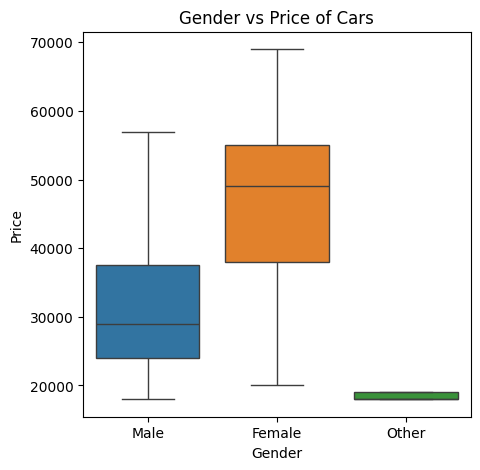

In [75]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df,x='Gender',y='Price', hue="Gender",showfliers=False)
plt.title("Gender vs Price of Cars")
plt.show()

* There is a significant disparity between the median amount spent on cars by men and women. The median car price for men is around 30,000, whereas for women, it is approximately 50,000, indicating a substantial difference.

###Number of dependents vs Car make

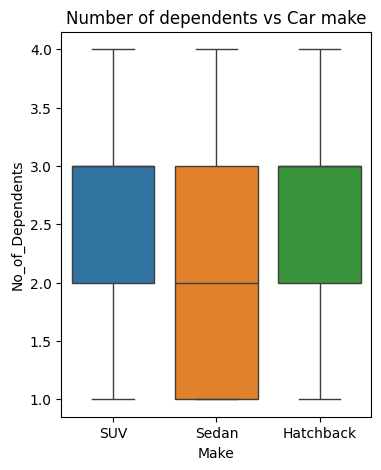

In [78]:
plt.figure(figsize=(4,5))
sns.boxplot(data=df,x='Make',y='No_of_Dependents',hue="Make",showfliers=False)
plt.title("Number of dependents vs Car make")
plt.show()

In [50]:
df.loc[df['Make'] == "SUV", 'No_of_Dependents'].median()

3.0

In [51]:
df.loc[df['Make'] == "Sedan", 'No_of_Dependents'].median()

2.0

In [52]:
df.loc[df['Make'] == "Hatchback", 'No_of_Dependents'].median()

3.0

Customers may lean towards SUVs or hatchbacks when they have more dependents to accommodate.







### Personal Loan Recipients vs Price of cars

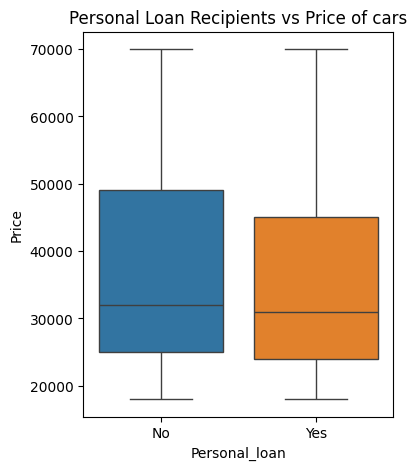

In [81]:
plt.figure(figsize=(4,5))
sns.boxplot(data=df,x='Personal_loan',y='Price', hue="Personal_loan",showfliers=False)
plt.title("Personal Loan Recipients vs Price of cars")
plt.show()

* Distribution is comparable in terms of central tendency and median.
* Personal Loan do not influence negatively on car expenditure.

In [54]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

###Partner's working status vs Price of car

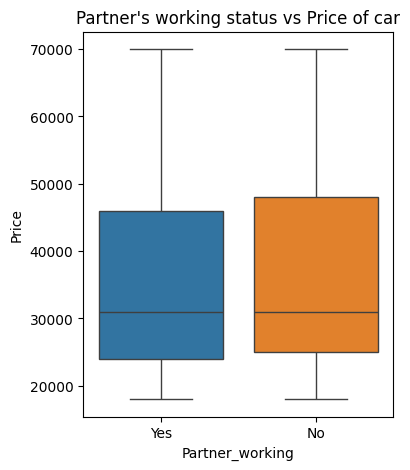

In [82]:
plt.figure(figsize=(4,5))
sns.boxplot(data=df,x='Partner_working',y='Price', hue="Partner_working",showfliers=False)
plt.title("Partner's working status vs Price of car")
plt.show()

* Distribution is comparable in terms of central tendency and median.
* Unemployment of Partner Does Not Negatively Impact Car Expenditure.

##Relationship between Categorical variables

###Gender vs Make

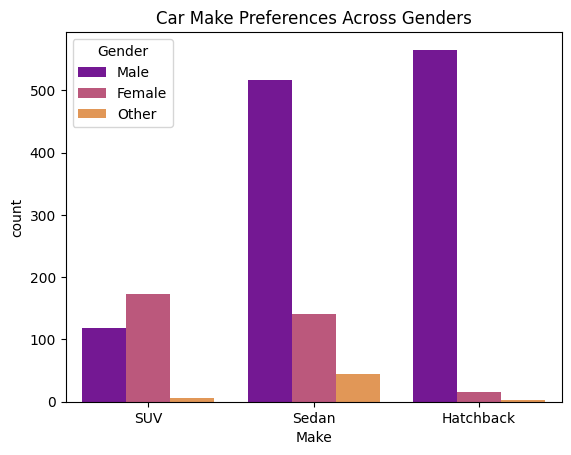

In [56]:
plt.figsize=(10, 5)
sns.countplot(x=df['Make'], hue=df['Gender'], palette='plasma')
plt.title("Car Make Preferences Across Genders")
plt.show()

Women Favor SUVs, While Men Prefer Hatchbacks and Sedans

###Profession vs Make

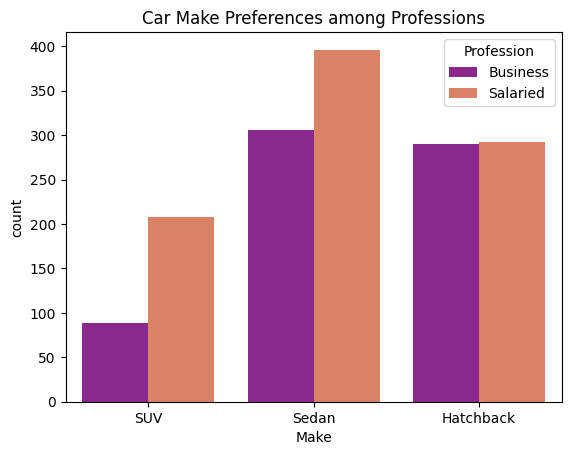

In [86]:
plt.figsize=(4, 4)
sns.countplot(x=df['Make'], hue=df['Profession'], palette='plasma')
plt.title("Car Make Preferences among Professions")
plt.show()

Sedans Preferred by Both Salaried Employees and Business Owners

###Profession vs Gender vs Make of car

In [58]:
#Calculating the count of each category

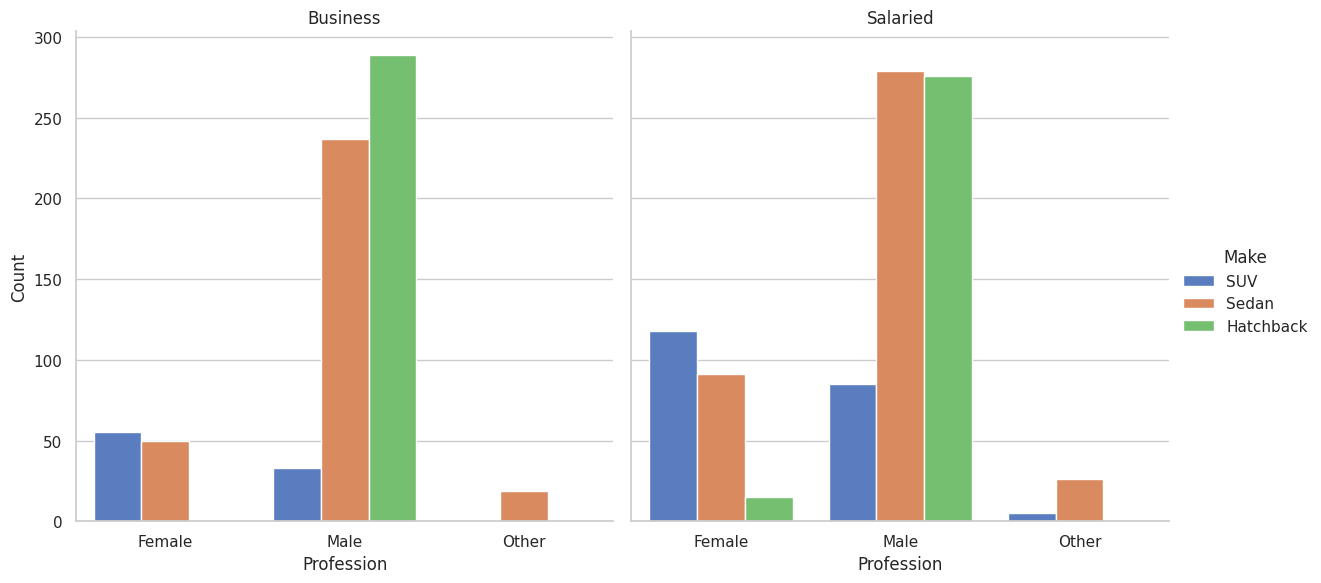

In [87]:
grouped=df.groupby(['Gender','Profession', 'Make']).size().reset_index(name='Count')
sns.set(style="whitegrid")
plt.figsize=(4, 4)
# Create a grouped bar plot using catplot
g = sns.catplot(x='Gender', y='Count', hue='Make', col='Profession', data=grouped,
                kind='bar', height=6, aspect=1, palette='muted')

# Set titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Profession", "Count")

# Show the plot
plt.show()

Salaried men prefers Sedan and Hatchback over SUV

#**Key Questions**

##**Question 1:** Do men tend to prefer SUVs more compared to women?

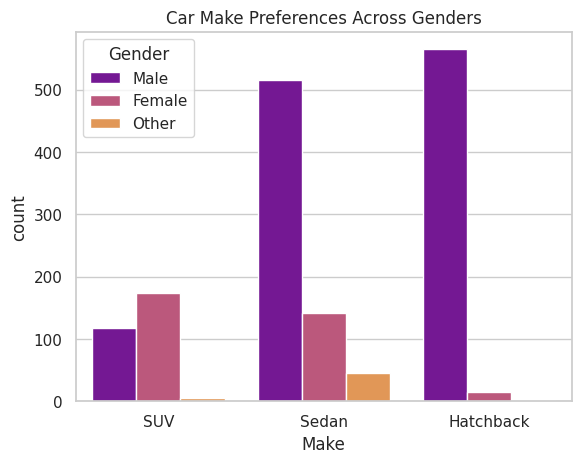

In [88]:
plt.figsize=(10, 5)
sns.countplot(x=df['Make'], hue=df['Gender'], palette='plasma')
plt.title("Car Make Preferences Across Genders")
plt.show()

In [89]:
q1_df=df.groupby(["Gender","Make"]).size().reset_index(name="Count")


In [90]:
q1_df[q1_df["Make"]=="SUV"]

,Gender,Make,Count
1,Female,SUV,173
4,Male,SUV,118
7,Other,SUV,6


No, Women show a greater preference for SUVs compared to men

##**Question 2:** What is the likelihood of a salaried person buying a Sedan?

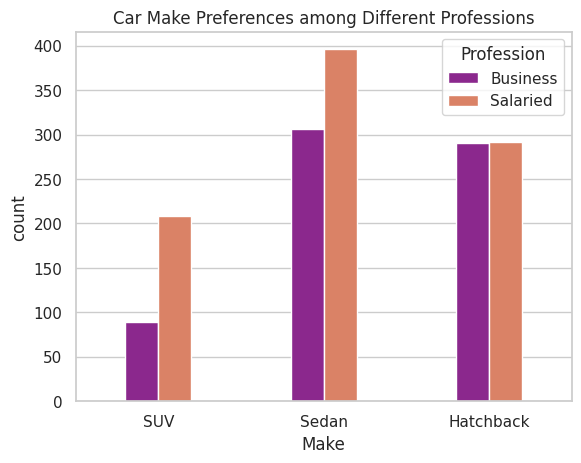

In [95]:
plt.figsize=(5, 5)
sns.countplot(x=df['Make'], hue=df['Profession'], palette='plasma', width= 0.4)
plt.title("Car Make Preferences among Different Professions")
plt.show()

In [96]:
q2_df=df.groupby(["Profession","Make"]).size().reset_index(name="Count")


In [97]:
q2_df

,Profession,Make,Count
0,Business,Hatchback,290
1,Business,SUV,89
2,Business,Sedan,306
3,Salaried,Hatchback,292
4,Salaried,SUV,208
5,Salaried,Sedan,396


In [98]:
no_of_salaried_people=(df["Profession"]=="Salaried").sum()

In [99]:
no_of_salaried_people_buys_sedan=((df["Profession"]=="Salaried") & (df["Make"]=="Sedan")).sum()

In [100]:
Percent=(no_of_salaried_people_buys_sedan/no_of_salaried_people)*100

In [104]:
print("Number of Salaried People:",no_of_salaried_people)
print("Number of People who buys Sedan:",no_of_salaried_people_buys_sedan)
print("Percentage of Salaried person buying a Sedan:",round(Percent,2),"%")


Number of Salaried People: 896
Number of People who buys Sedan: 396
Percentage of Salaried person buying a Sedan: 44.2 %


In [69]:
Percent

44.19642857142857

A salaried person has a 44% probability of purchasing a sedan.

##**Question 3:** What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

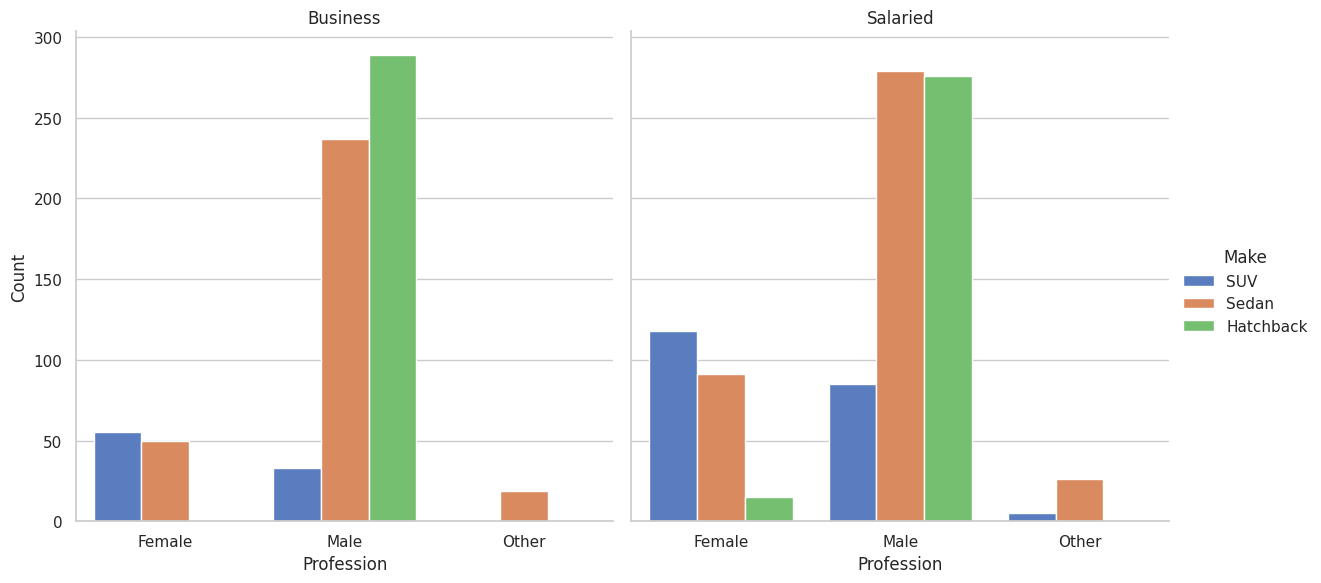

In [70]:
grouped=df.groupby(['Gender','Profession', 'Make']).size().reset_index(name='Count')
sns.set(style="whitegrid")
plt.figsize=(7, 4)
# Create a grouped bar plot using catplot
g = sns.catplot(x='Gender', y='Count', hue='Make', col='Profession', data=grouped,
                kind='bar', height=6, aspect=1, palette='muted')

# Set titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Profession", "Count")
# Show the plot
plt.show()


# Car Preferences Across Genders and Professions

According to the data visualization, salaried men tend to prefer sedans and hatchbacks over SUVs. Targeting men for SUV sales could be effective, given their preference for sedans and hatchbacks according to the plot.

##**Question 4:** How does the amount spent on purchasing automobiles vary by gender?

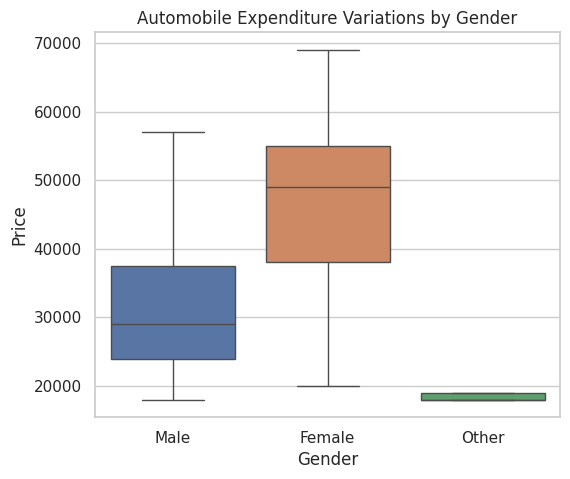

In [105]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df,x='Gender',y='Price', hue="Gender",showfliers=False)
plt.title("Automobile Expenditure Variations by Gender")
plt.show()

In [72]:
expenditure_male=df.loc[df['Gender'] == "Male", 'Price'].sum()
expenditure_female=df.loc[df['Gender'] == "Female", 'Price'].sum()
expenditure_other=df.loc[df['Gender'] == "Other", 'Price'].sum()

In [73]:
print("Expenditure by Male:",expenditure_male)
print("Expenditure by Female:",expenditure_female)
print("Expenditure by Other:",expenditure_other)

Expenditure by Male: 39348000
Expenditure by Female: 15695000
Expenditure by Other: 1237000


Women tend to spend more money on cars compared to men and individuals of other genders.







##**Question 5:** How much money was spent on purchasing automobiles by individuals who took a personal loan?

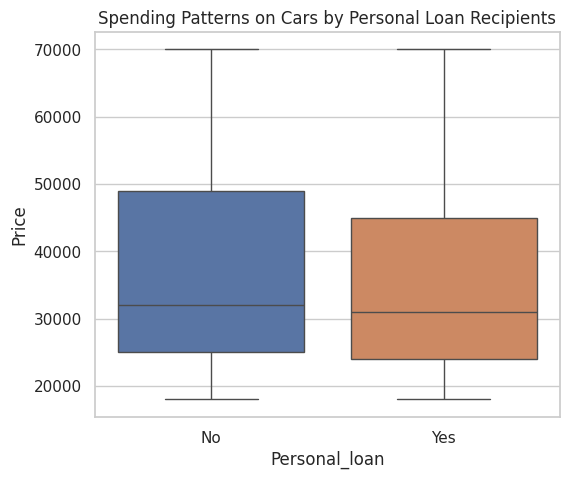

In [106]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df,x='Personal_loan',y='Price', hue="Personal_loan",showfliers=False)
plt.title("Spending Patterns on Cars by Personal Loan Recipients")
plt.show()

In [75]:
df.groupby(["Personal_loan"])["Price"].sum()

Personal_loan
No     28990000
Yes    27290000
Name: Price, dtype: int64

In [76]:
exp_by_personal_loan_recipients=df.loc[df['Personal_loan'] == "Yes", 'Price'].sum()

In [77]:
print("Personal loan recipients spend ",exp_by_personal_loan_recipients," on cars.")

Personal loan recipients spend  27290000  on cars.


##**Question 6:** How does having a working partner influence the purchase of higher-priced cars?

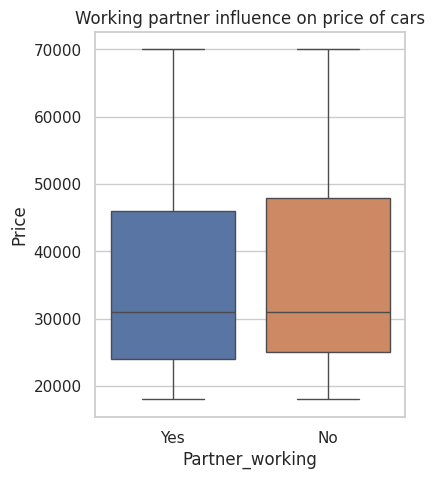

In [108]:
plt.figure(figsize=(4,5))
sns.boxplot(data=df,x='Partner_working',y='Price', hue="Partner_working",showfliers=False)
plt.title("Working partner influence on price of cars")
plt.show()

###t-test

* Null Hypothesis (H0): The mean price of cars bought by individuals with working partners is equal to the mean price of cars bought by individuals without working partners.
* Alternative Hypothesis (H1): The mean price of cars bought by individuals with working partners is different from the mean price of cars bought by individuals without working partners.

In [109]:
car_prices_working = df[df['Partner_working'] == 'Yes']['Price']
car_prices_non_working = df[df['Partner_working'] == 'No']['Price']

In [110]:
t_statistic, p_value = stats.ttest_ind(car_prices_working, car_prices_non_working)


In [111]:
t_statistic

-1.063364944753348

In [112]:
p_value

0.28777907676113346

In [114]:

print("t_statistic:",t_statistic)
print("p-value:",p_value)

t_statistic: -1.063364944753348
p-value: 0.28777907676113346


p-value is greater than the significance level ie, 0.05. So we can't reject the null hypothesis. Distribution is comparable in terms of central tendency and median. No negative or positive impact on expenditure on cars based on partner's working status

In [83]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

#**Actionable insights and recommendations**

##Insights

We analyzed a dataset containing information from 1,500 customers regarding their car types and expenditures. Several factors influence car purchases, such as age, gender, profession, and loan status. Additionally, individual and partner salaries, as well as the number of dependents, can also play significant roles in these purchasing decisions. Therefore, we identified the factors that can have a positive impact on the marketing campaign.


1. The preferred car type among customers is sedan, followed by hatchback and then SUV.
2. The majority of customers purchase cars priced under 50,000.
3. Most customers are married and customers may lean towards SUVs or hatchbacks when they have more dependents to accommodate.
4. There is a positive correlation between customer age and car price.
5. Women tend to spend more on cars compared to men.
6. The working status of the partner or personal loan status does not impact car purchases.
7. Women prefer SUVs while men prefer hatchbacks.
8. Customers who own businesses prefer hatchbacks and sedans.
9. Salaried males prefer sedans followed by hatchbacks.
10. Men who own businesses prefer hatchbacks over sedans while salaried or businesswomen prefer SUVs.


##Recommendations

1. Given the demand for sedans, it would be beneficial to focus more marketing efforts on promoting this car type.
2. Since women tend to spend more on cars, a targeted marketing campaign highlighting specific car features that appeal to women could be effective in attracting this demographic.
3. The marketing campaign could focus on targeting married individuals, who make up the majority of the customer base. However, the campaign can also include strategies to attract the minority of single individuals.
4. Given that customers with more dependents tend to prefer SUVs or hatchbacks, it would be strategic to concentrate marketing efforts on this demographic.
5. Additional data on the timeline of purchases should be acquired to facilitate trend analysis and the development of a predictive model.
